Importing  necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings; warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.drop(columns = ["Car_Name","Year"],inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Driven_kms     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Selling_type   301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 16.6+ KB


In [5]:
df.shape

(301, 7)

In [6]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189
std,5.082812,8.642584,38886.883882,0.247915
min,0.100000,0.320000,500.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000
50%,3.600000,6.400000,32000.000000,0.000000
75%,6.000000,9.900000,48767.000000,0.000000
max,35.000000,92.600000,500000.000000,3.000000


In [7]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [8]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [9]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [10]:
df.isna().sum()

Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df['Owner']=df['Owner'].astype("category")
categorical_cols = df.select_dtypes(include = "object").columns
df[categorical_cols] = df[categorical_cols].astype("category")

In [13]:
continous_col = df.select_dtypes(include = ["float64","int64"]).columns

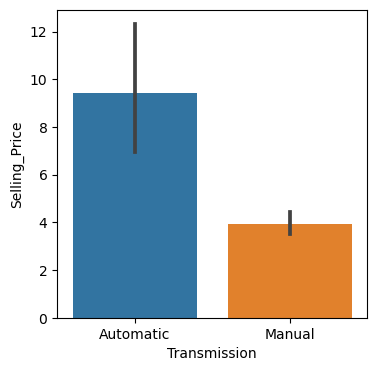

In [14]:
plt.figure(figsize=[4,4])
sns.barplot(x=df['Transmission'],y=df['Selling_Price'])
plt.show()

 Selling price for Automatic cars are more then manual cars

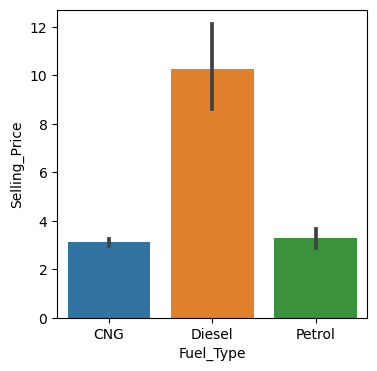

In [15]:
plt.figure(figsize=[4,4])
sns.barplot(x=df['Fuel_Type'],y=df['Selling_Price'])
plt.show()

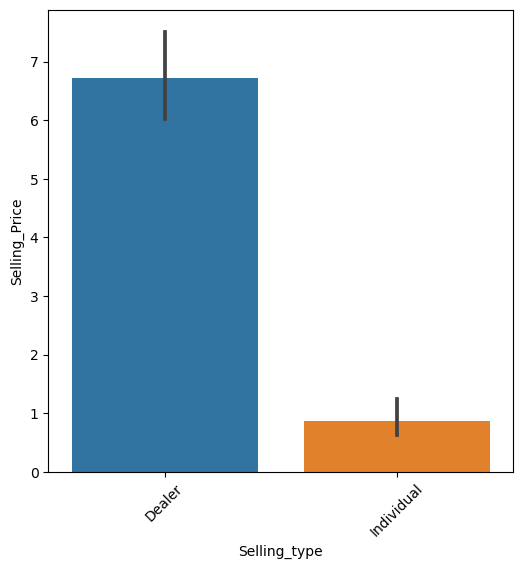

In [16]:
plt.figure(figsize=[6,6])
plt.xticks(rotation=45)
sns.barplot(x=df['Selling_type'],y=df['Selling_Price'])
plt.show()

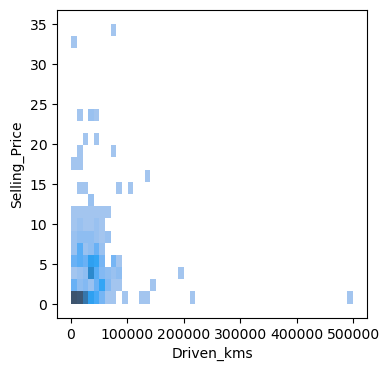

In [17]:
plt.figure(figsize=[4,4])
sns.histplot(x=df['Driven_kms'],y=df['Selling_Price'])
plt.show()

Selling price of less driven cars are higher

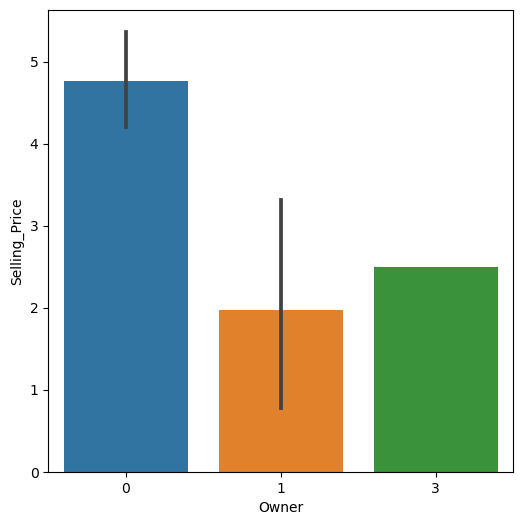

In [18]:
plt.figure(figsize=[6,6])

sns.barplot(x=df['Owner'],y=df['Selling_Price'])
plt.show()

Selling price of cars that have 0 owner are higher

Dealer selling_type cars have more selling price then the Individual ones

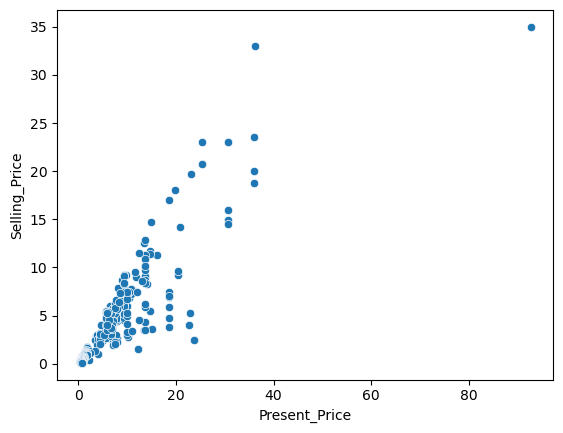

In [19]:
sns.scatterplot(y = df['Selling_Price'],x = df['Present_Price'])
plt.show()

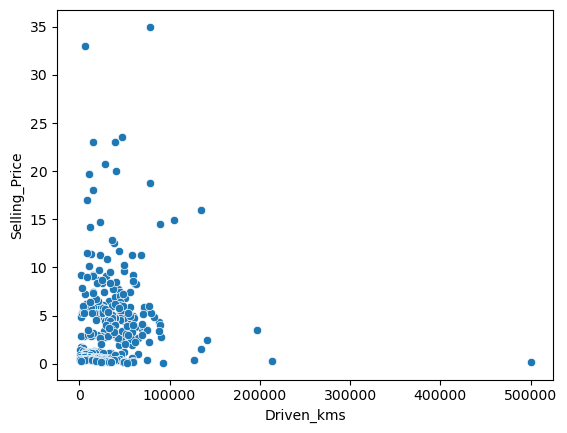

In [20]:
sns.scatterplot(y = df['Selling_Price'],x = df['Driven_kms'])
plt.show()

<AxesSubplot:>

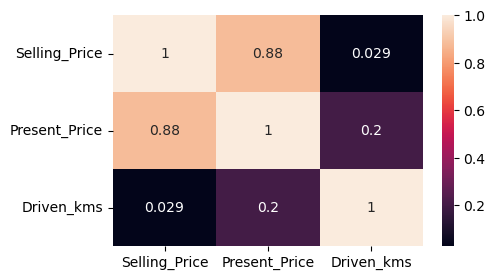

In [21]:
plt.figure(figsize = (5,3))
sns.heatmap(df.corr(),annot = True)

### Train-Test Split

In [22]:
y = df['Selling_Price']
X = df.drop('Selling_Price',axis=1)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 6), (61, 6), (240,), (61,))

In [25]:
scaler = MinMaxScaler()
numeric_col = X_train.select_dtypes(include = ["float64","int64"]).columns
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

In [26]:
X_train.shape,X_test.shape

((240, 6), (61, 6))

In [27]:
X_train_dummies = pd.get_dummies(data = X_train,columns = ["Fuel_Type","Selling_type","Transmission","Owner"],drop_first = True)
X_test_dummies = pd.get_dummies(data = X_test,columns = ["Fuel_Type","Selling_type","Transmission","Owner"],drop_first=True)

In [28]:
X_train_dummies.shape,X_test_dummies.shape

((240, 8), (61, 8))

In [29]:
estimator = LinearRegression()
rfe = RFE(estimator,n_features_to_select=5)
rfe = rfe.fit(X_train_dummies,y_train)
rfe.support_

array([ True,  True,  True, False, False,  True, False,  True])

In [30]:
best_feature = X_train_dummies.columns[rfe.support_]
best_feature

Index(['Present_Price', 'Driven_kms', 'Fuel_Type_Diesel',
       'Transmission_Manual', 'Owner_3'],
      dtype='object')

In [31]:
X_train = X_train_dummies[best_feature]
X_test = X_test_dummies[best_feature]
X_train.shape, X_test.shape

((240, 5), (61, 5))

In [32]:
vif_data = pd.DataFrame()
vif_data["Features"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Features,VIF
0,Present_Price,2.018875
1,Driven_kms,1.770536
2,Fuel_Type_Diesel,1.617625
3,Transmission_Manual,1.673829
4,Owner_3,1.062247


In [33]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [34]:
X_train.shape,X_test.shape

((240, 6), (61, 6))

In [35]:
st_model = sm.OLS(y_train,X_train)
st_model = st_model.fit()
print(st_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     231.3
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.06e-88
Time:                        16:56:27   Log-Likelihood:                -516.60
No. Observations:                 240   AIC:                             1045.
Df Residuals:                     234   BIC:                             1066.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0134    

In [36]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train[["Present_Price","Driven_kms","Fuel_Type_Diesel","Transmission_Manual","Owner_3"]],y_train)

In [37]:
print("Coefficient :",lr_model.coef_)

Coefficient : [41.92241188 -9.9783274   2.37862058 -1.65942372 -8.3217596 ]


In [38]:
X_train.shape,X_test.shape

((240, 6), (61, 6))

In [39]:
y_pred = lr_model.predict(X_test[["Present_Price","Driven_kms","Fuel_Type_Diesel","Transmission_Manual","Owner_3"]])

In [40]:
Testing_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
Testing_mape = np.mean(np.abs(y_test - y_pred)/y_test)*100

Testing_rmse = np.round(Testing_rmse,2)
Testing_mape = np.round(Testing_mape,2)

In [41]:
Testing_Accuracy = np.round(r2_score(y_test,y_pred)*100,2)
Testing_Accuracy 

87.77

In [42]:
print("Testing Accuracy :",Testing_Accuracy,"%")
print("Testing Rmse :",Testing_rmse)
print("Testing Mape :",Testing_mape)

Testing Accuracy : 87.77 %
Testing Rmse : 1.76
Testing Mape : 53.48
